In [ ]:
!git clone https://github.com/AtrikDas/ABBA.git

Cloning into 'ABBA'...
remote: Enumerating objects: 448, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (330/330), done.
remote: Total 448 (delta 109), reused 435 (delta 98), pack-reused 0
Receiving objects: 100% (448/448), 10.14 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [ ]:
cd ABBA

/content/ABBA


In [ ]:
!pip install foolbox==2.3.0 pytorchcv numpy scipy torchvision opencv-python yacs tqdm visdom

  Using cached foolbox-2.3.0.tar.gz (1.9 MB)
  Using cached pytorchcv-0.0.67-py2.py3-none-any.whl (532 kB)
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached visdom-0.1.8.9.tar.gz (676 kB)


In [ ]:
!pip show foolbox

Name: foolbox
Version: 2.3.0
Summary: Python toolbox to create adversarial examples that fool neural networks
Home-page: https://github.com/bethgelab/foolbox
Author: Jonas Rauber & Wieland Brendel
Author-email: opensource@bethgelab.org
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, GitPython, requests, scipy, setuptools
Required-by: 


In [ ]:
cd /usr/local/lib/python3.7/dist-packages/foolbox/attacks

/usr/local/lib/python3.7/dist-packages/foolbox/attacks


In [ ]:
rm iterative_projected_gradient.py

In [ ]:
mv '/content/ABBA/foolbox2.3.0/attacks/iterative_projected_gradient.py' '/usr/local/lib/python3.7/dist-packages/foolbox/attacks/iterative_projected_gradient.py'

In [ ]:
cd /content/ABBA

/content/ABBA


In [ ]:
!python blurattack.py -d dev -g 0 -m gblur -i 1 -w inceptionv3 -e 0.4,15.0 -b whole

dataset path:./datasets/dev/images
gpu id:0


Start Test...
eplison:[ 0.4 15. ]
dev/inceptionv3_inceptionv3_gblur/eplison_0.4_15.0_stepsize_10_blur_strategy_whole/
savename:dev/inceptionv3_inceptionv3_gblur/eplison_0.4_15.0_stepsize_10_blur_strategy_whole/
Traceback (most recent call last):
  File "blurattack.py", line 1197, in <module>
    main(sys.argv)
  File "blurattack.py", line 1166, in main
    eplison, blur_strategy, step_size,numSP=numSP,mask_att_l1=mask_att_l1,direction=direction,deblurred = deblurred,gpuid=gpu_id)
  File "blurattack.py", line 313, in test_dev
    datasets.Dev(valdir, target_file='dev_dataset.csv', transform = transforms.Compose([transforms.ToTensor()])),
AttributeError: module 'torchvision.datasets' has no attribute 'Dev'


In [ ]:
!pip install foolbox

     |████████████████████████████████| 1.7 MB 2.7 MB/s 
     |████████████████████████████████| 180 kB 49.9 MB/s 
     |████████████████████████████████| 62 kB 847 kB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import torch
import torchvision.models as models
import eagerpy as ep
from foolbox import PyTorchModel, accuracy, samples
# from foolbox.models import PyTorchModel
from foolbox.attacks import FGSM
from foolbox.criteria import Misclassification
from fastai import *
from fastai.vision import *
import foolbox as fb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loc = torch.load('/content/drive/MyDrive/FYP/resnet34_new.pth')
body = create_body(models.resnet34, True, None)
data_classes = 2
nf = callbacks.hooks.num_features_model(body) * 2
head = create_head(nf, data_classes, None, ps=0.5, bn_final=False)
model = nn.Sequential(body, head)

In [ ]:
model.load_state_dict(loc['model'])
model = model.eval()

In [ ]:
!pip install foolbox==2.3.0

In [ ]:
fmodel = PyTorchModel(model, bounds=(0, 1))

In [ ]:
import cv2
import os
from PIL import Image
from typing import Optional, Tuple, Any
import eagerpy as ep
import warnings
import numpy as np

def load_images_from_folder(fmodel, folder):
    images = []
    labels = []
    # i = 0
    for filename in os.listdir(folder):
      # if i > 15:
      #   break
      # img = cv2.imread(os.path.join(folder,filename))
      img = Image.open(os.path.join(folder,filename))
      if img is not None:
        img = np.asarray(img, dtype=np.float32)
        img = np.transpose(img, (2, 0, 1))
        img = img/255

        if img.ndim == 2:
            img = img[..., np.newaxis]

        assert img.ndim == 3

        images.append(img)
        labels.append(int(str(folder)))

      # i += 1

    images = np.stack(images)
    labels = np.array(labels)

    if hasattr(fmodel, "dummy") and fmodel.dummy is not None:  # type: ignore
        images = ep.from_numpy(fmodel.dummy, images).raw  # type: ignore
        labels = ep.from_numpy(fmodel.dummy, labels).raw  # type: ignore
    else:
        warnings.warn(f"unknown model type {type(fmodel)}, returning NumPy arrays")

    return images, labels

In [ ]:
cd '/content/drive/MyDrive/FYP_Dataset'

/content/drive/MyDrive/FYP_Dataset


In [ ]:
images, labels = load_images_from_folder(fmodel, '0')

In [ ]:
type(images), images.shape

(torch.Tensor, torch.Size([880, 3, 256, 256]))

In [ ]:
type(labels), labels.shape

(torch.Tensor, torch.Size([880]))

In [ ]:
clean_acc = fb.utils.accuracy(fmodel, images, labels)
print(f"clean accuracy:  {clean_acc * 100:.1f} %")

RuntimeError: ignored

In [ ]:
#foolbox 2.3.0
def run_attack_gblur(model, image, label, step_size):

    # apply the attack
    distance = fb.distances.Linfinity
    attack = fb.attacks.GaussianBlurAttack(model, distance=distance)
    adversarial = attack(image, label, epsilons=[step_size],unpack=False)
    
    advs = [a.perturbed for a in adversarial]
    advs = [
        p if p is not None else np.full_like(u, np.nan)
        for p, u in zip(advs, image)
    ]
    perturbed_image = np.stack(advs)

    diff = np.linalg.norm(perturbed_image - image)
    if diff ==0:
        status =0
    else:
        if adversarial[0].adversarial_class is not None:
            status = 1
        else:
            status = -1

    return perturbed_image, status

In [ ]:
perturbed_image, status = run_attack_gblur(fmodel, images[0:1], labels[0:1], step_size=1000)

In [ ]:
plt.imshow(np.transpose(perturbed_image[0], (1, 2, 0)))

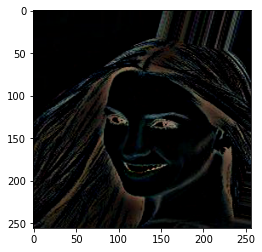

In [ ]:
plt.imshow(np.transpose(perturbed_image[0] - images[0], (1, 2, 0)))

In [ ]:
distance = fb.distances.LpDistance(10)
attack = fb.attacks.GaussianBlurAttack(distance=distance, steps=200)

raw_advs_array1 = []
clipped_advs_array1 = []
success_array1 = []
idx = 0
while idx < 880:
  criterion = Misclassification(labels[idx:idx+1])
  raw_advs, clipped_advs, success = attack(fmodel, images[idx:idx+1], labels[idx:idx+1], epsilons=5)
  raw_advs_array1.append(raw_advs)
  clipped_advs_array1.append(clipped_advs)
  success_array1.append(success)
  idx += 1
  print(len(clipped_advs_array1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
i = 0
for item in success_array1:
  if item == True:
   i+=1
print("Success rate = " , i/880 * 100)

Success rate =  95.3409090909091


In [ ]:
from torchvision.utils import save_image
i = 0
for batch in clipped_advs_array1:
  for image in batch:
    save_image(image, '/content/results/0/img_fake' + str(i) + '.png')
    i += 1

In [ ]:
!zip -r "/content/results_0.zip" "/content/results/0"

  adding: content/results/0/ (stored 0%)
  adding: content/results/0/img_fake744.png (deflated 0%)
  adding: content/results/0/img_fake810.png (deflated 0%)
  adding: content/results/0/img_fake90.png (deflated 0%)
  adding: content/results/0/img_fake665.png (deflated 0%)
  adding: content/results/0/img_fake391.png (deflated 0%)
  adding: content/results/0/img_fake749.png (deflated 0%)
  adding: content/results/0/img_fake414.png (deflated 0%)
  adding: content/results/0/img_fake30.png (deflated 0%)
  adding: content/results/0/img_fake439.png (deflated 0%)
  adding: content/results/0/img_fake792.png (deflated 0%)
  adding: content/results/0/img_fake294.png (deflated 0%)
  adding: content/results/0/img_fake728.png (deflated 0%)
  adding: content/results/0/img_fake821.png (deflated 0%)
  adding: content/results/0/img_fake72.png (deflated 0%)
  adding: content/results/0/img_fake556.png (deflated 0%)
  adding: content/results/0/img_fake715.png (deflated 0%)
  adding: content/results/0/img_fa

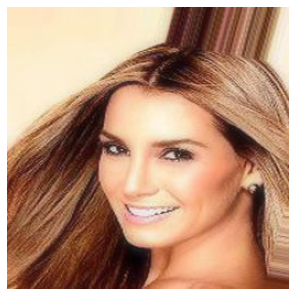

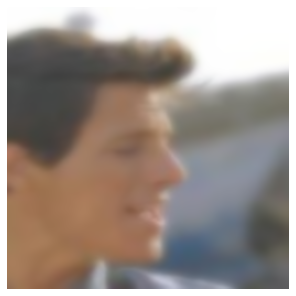

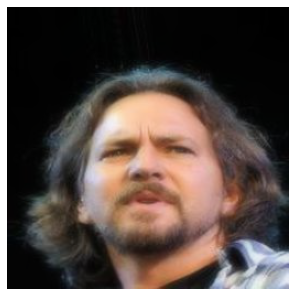

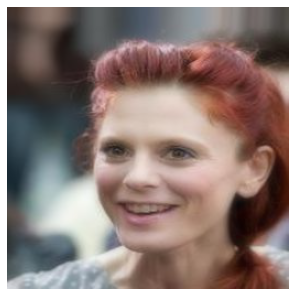

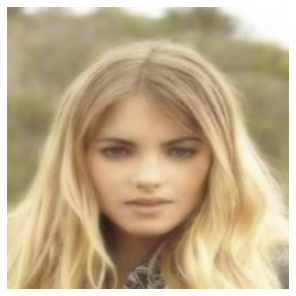

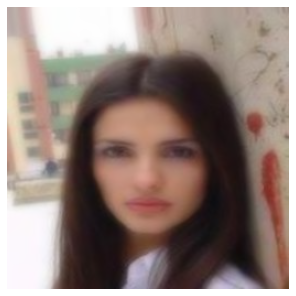

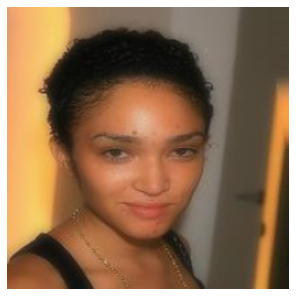

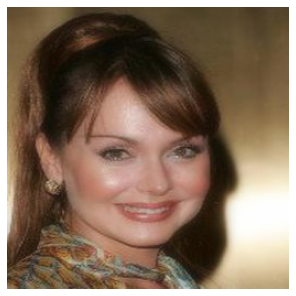

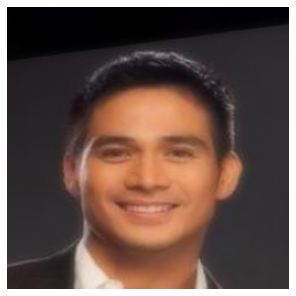

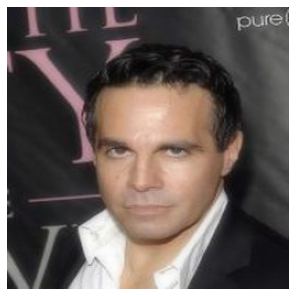

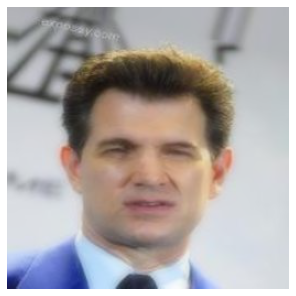

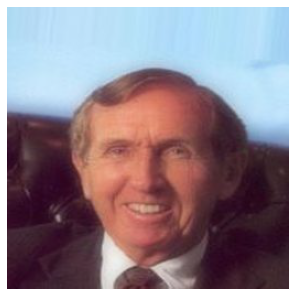

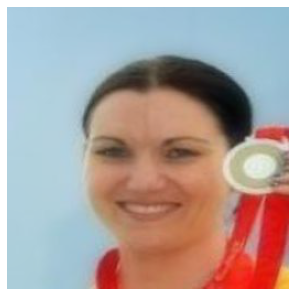

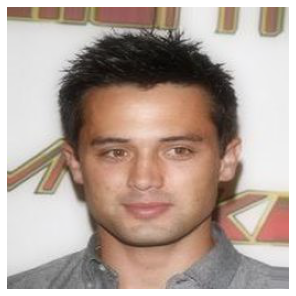

In [ ]:
for i in range(16):
  fb.plot.images(clipped_advs_array1[i], scale=4.)

In [ ]:
fb.plot.images(images[0:1], scale=4.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

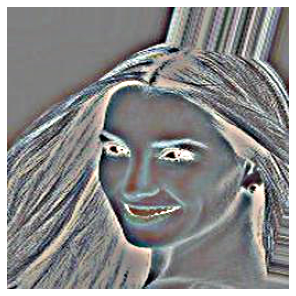

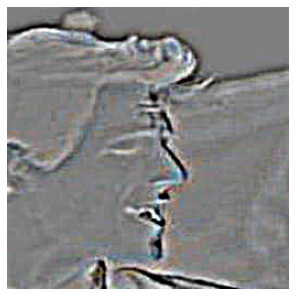

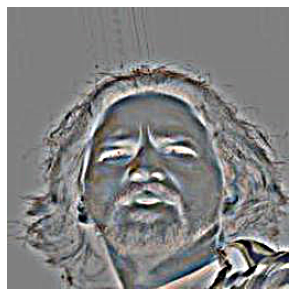

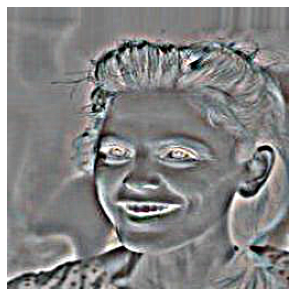

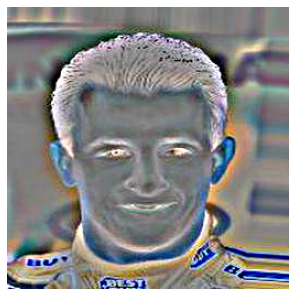

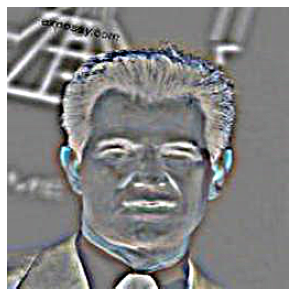

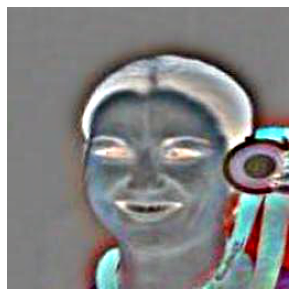

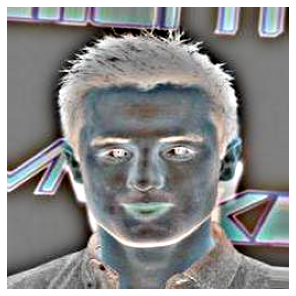

In [ ]:
for i in range(16):
  fb.plot.images(clipped_advs_array1[i] - images[i], bounds=(-0.1, 0.1), scale=4.)